In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Total train images: {x_train.shape[0]} images")
print(f"Total test images: {x_train.shape[1]}x{x_train.shape[2]} pixel")

Total train images: 60000 images
Total test images: 28x28 pixel


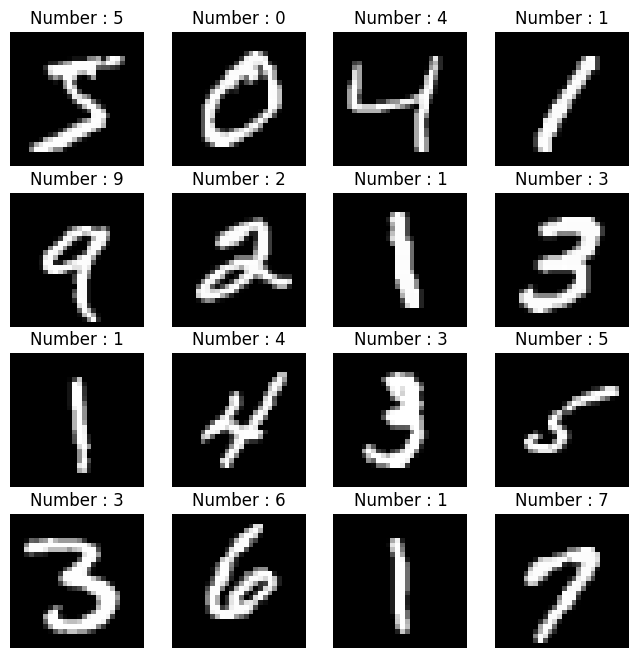

In [ ]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Number : {y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"New Shape : {x_train.shape}")

New Shape : (60000, 28, 28, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)

datagen.fit(x_train)

In [ ]:
model_mnist = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(28,28,1)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_mnist.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_aug = model_mnist.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=12,
    validation_data=(x_test, y_test))

Epoch 1/12


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7750 - loss: 0.6846 - val_accuracy: 0.9821 - val_loss: 0.0565
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.9473 - loss: 0.1729 - val_accuracy: 0.9876 - val_loss: 0.0372
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9637 - loss: 0.1214 - val_accuracy: 0.9912 - val_loss: 0.0276
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9705 - loss: 0.0996 - val_accuracy: 0.9893 - val_loss: 0.0300
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.9741 - loss: 0.0860 - val_accuracy: 0.9928 - val_loss: 0.0241
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9771 - loss: 0.0780 - val_accuracy: 0.9911 - val_loss: 0.0261
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9792 - loss: 0.0694 - val_accuracy: 0.9915 - val_loss: 0.0258
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9814 - loss: 0.06

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


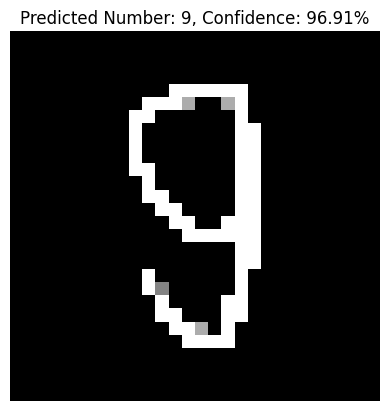

In [ ]:
from tensorflow.keras.preprocessing import image
import cv2

number_img = #put your number image here

def predict_number(path_file):
  img = cv2.imread(path_file, cv2.IMREAD_GRAYSCALE)

  img = 255-img

  _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

  coords = cv2.findNonZero(img)
  x, y, w, h = cv2.boundingRect(coords)

  img_crop = img[y:y+h, x:x+w]

  target_size = 20
  aspect_ratio = w/h

  if aspect_ratio > 1:
    new_w = target_size
    new_h = int(target_size / aspect_ratio)
  else:
    new_h = target_size
    new_w = int(target_size * aspect_ratio)

  img_resize = cv2.resize(img_crop, (new_w, new_h))

  final_img = np.zeros((28, 28), dtype=np.uint8)

  pad_top = (28 - new_h) // 2
  pad_left = (28 - new_w) // 2

  final_img[pad_top:pad_top+new_h, pad_left:pad_left+new_w] = img_resize

  img_final = np.expand_dims(final_img, axis=0)
  img_final = np.expand_dims(img_final, axis=-1)

  prediction = model_mnist.predict(img_final)
  predicted_number = np.argmax(prediction)
  confidence = np.max(prediction) * 100

  plt.imshow(final_img, cmap='gray')
  plt.title(f"Predicted Number: {predicted_number}, Confidence: {confidence:.2f}%")
  plt.axis('off')
  plt.show()

predict_number_v2(number_img)